# DigitwiML - A Hybrid Model approach to create Digital Twins for C.Elegans to analyse the effect of space factors on living organisms

## Scope of Analysis: Analyze the effect of altered gravity on 1st Generation (N2 Strain) samples of Wild GenoType from NASA Gene Lab's OSD-425 Data

## Importing necessary libraries & Scripts

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox, ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings 
warnings.filterwarnings('ignore')

# Custom python script to create a simple digital twin
import DigitwiML

## Data collection & Pre-processing

In [2]:
df_425 = pd.read_csv("data/GLDS-425_array_normalized_expression.csv", header=[0]) 

In [3]:
df_425.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45220 entries, 0 to 45219
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENSEMBL                 34396 non-null  object 
 1   SYMBOL                  29276 non-null  object 
 2   GENENAME                29276 non-null  object 
 3   REFSEQ                  29094 non-null  object 
 4   ENTREZID                29276 non-null  float64
 5   STRING_id               29672 non-null  object 
 6   GOSLIM_IDS              11248 non-null  object 
 7   ProbeUID                45220 non-null  int64  
 8   ProbeName               45220 non-null  object 
 9   count_ENSEMBL_mappings  45220 non-null  int64  
 10  GSM5284006              45220 non-null  float64
 11  GSM5284007              45220 non-null  float64
 12  GSM5284008              45220 non-null  float64
 13  GSM5284009              45220 non-null  float64
 14  GSM5284010              45220 non-null

In [4]:
df = df_425.set_index('GENENAME')

## Exploratory Data Analysis

### Sample Set Comparison 1:

In [5]:
#(Wild Type & Space Flight & 1st generation & 1G in CBEF)v(Wild Type & Space Flight & 1st generation & uG)
# Load initial data
earth_data = df['GSM5284012'].values
space_data = df['GSM5284006'].values

In [6]:
genes = df.index

# Calculate the differential expression (space - earth)
differential_expressions = space_data - earth_data

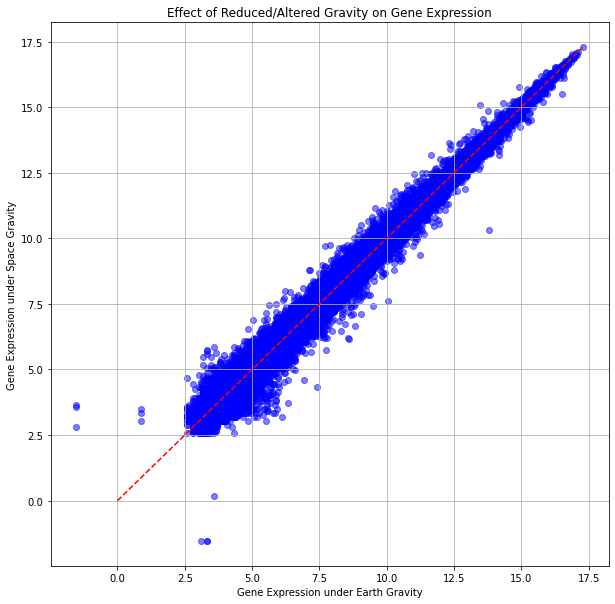

In [7]:
# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(earth_data, space_data, color='blue', alpha=0.5)

# Plot the y=x line, representing no change due to altered gravity
max_val = max(np.max(earth_data), np.max(space_data))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.xlabel("Gene Expression under Earth Gravity")
plt.ylabel("Gene Expression under Space Gravity")
plt.title("Effect of Reduced/Altered Gravity on Gene Expression")
plt.grid(True)

plt.show()

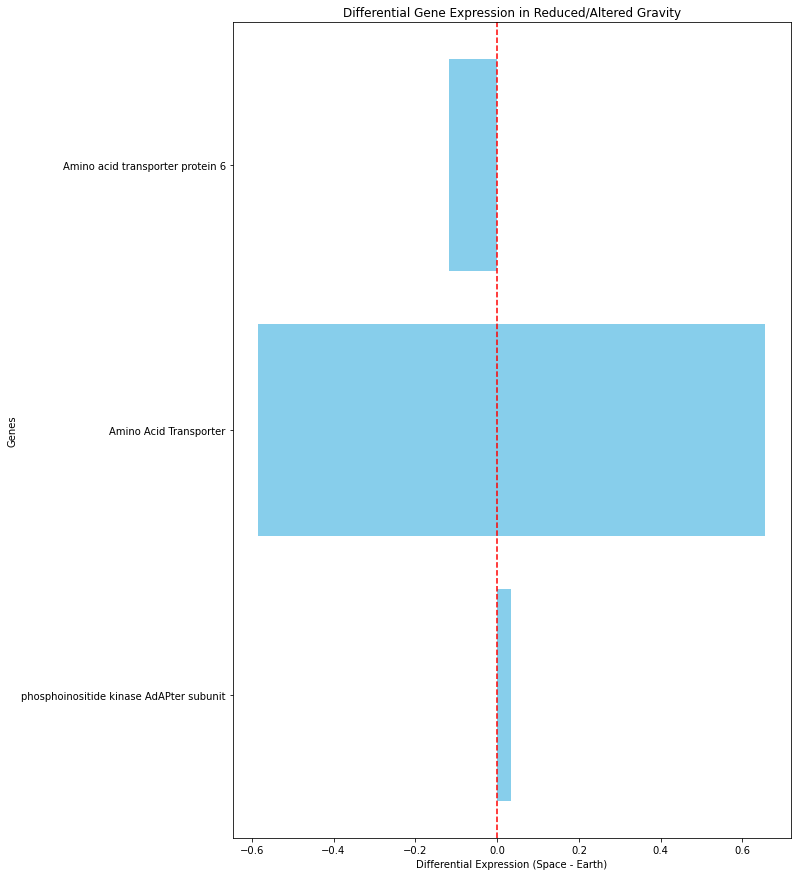

In [8]:
# Plot
plt.figure(figsize=(10, 15))
plt.barh(genes[0:15], differential_expressions[0:15], color='skyblue')
plt.xlabel('Differential Expression (Space - Earth)')
plt.ylabel('Genes')
plt.title('Differential Gene Expression in Reduced/Altered Gravity')
plt.axvline(0, color='red', linestyle='--')  # Reference line for no change
plt.show()

### Sample Set Comparison 2:

In [9]:
#(Wild Type & Space Flight & 1st generation & 1G in CBEF)v(Wild Type & Space Flight & 1st generation & uG)
# Load initial data
earth_data = df['GSM5284014'].values
space_data = df['GSM5284008'].values

In [10]:
genes = df.index

# Calculate the differential expression (space - earth)
differential_expressions = space_data - earth_data

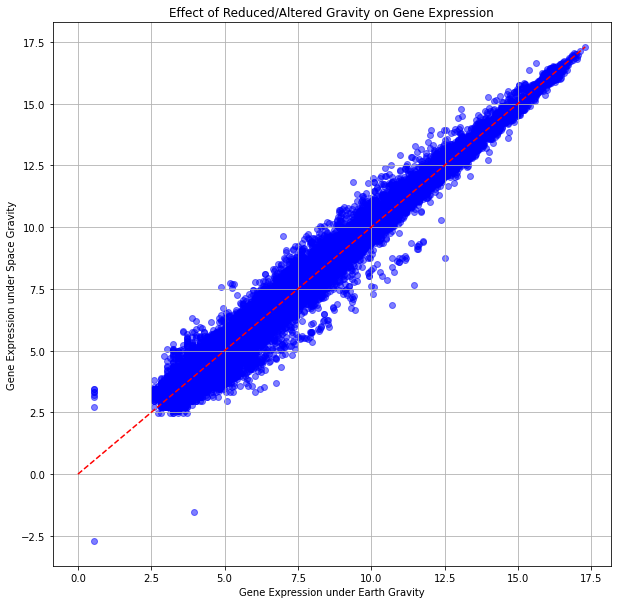

In [11]:
# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(earth_data, space_data, color='blue', alpha=0.5)

# Plot the y=x line, representing no change due to altered gravity
max_val = max(np.max(earth_data), np.max(space_data))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.xlabel("Gene Expression under Earth Gravity")
plt.ylabel("Gene Expression under Space Gravity")
plt.title("Effect of Reduced/Altered Gravity on Gene Expression")
plt.grid(True)

plt.show()

### Sample Set Comparison 3:

In [12]:
#(Wild Type & Space Flight & 1st generation & 1G in CBEF)v(Wild Type & Space Flight & 1st generation & uG)
# Load initial data
earth_data = df['GSM5284016'].values
space_data = df['GSM5284010'].values

In [13]:
genes = df.index

# Calculate the differential expression (space - earth)
differential_expressions = space_data - earth_data

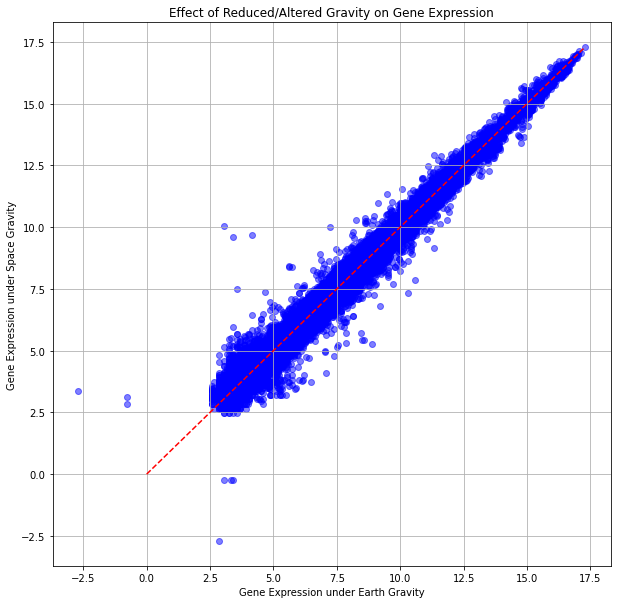

In [14]:
# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(earth_data, space_data, color='blue', alpha=0.5)

# Plot the y=x line, representing no change due to altered gravity
max_val = max(np.max(earth_data), np.max(space_data))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.xlabel("Gene Expression under Earth Gravity")
plt.ylabel("Gene Expression under Space Gravity")
plt.title("Effect of Reduced/Altered Gravity on Gene Expression")
plt.grid(True)

plt.show()

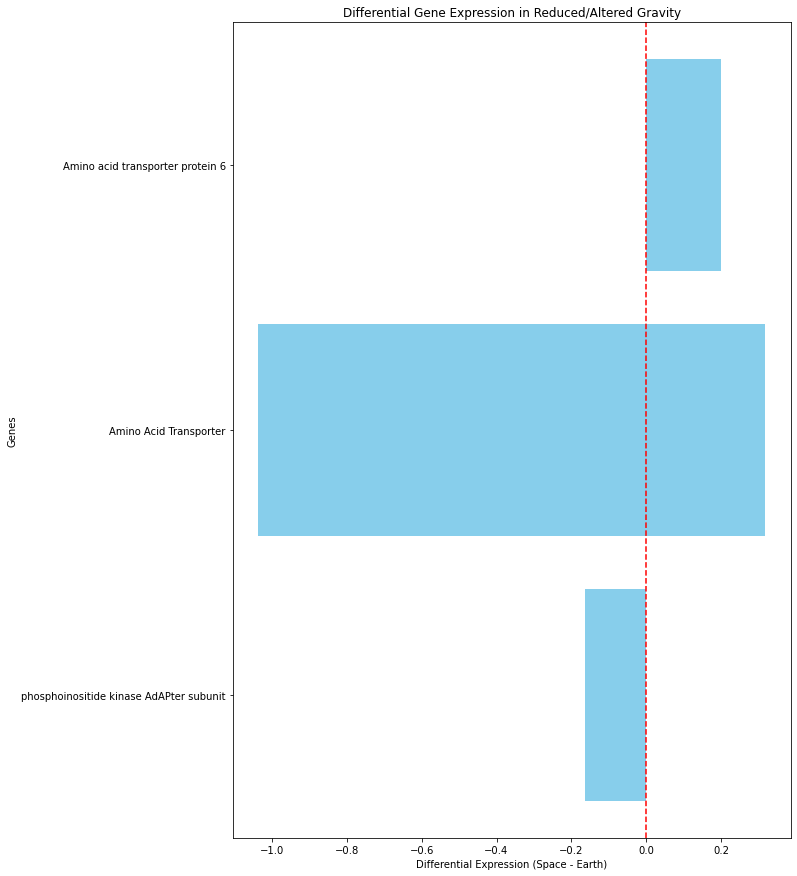

In [15]:
# Plot
plt.figure(figsize=(10, 15))
plt.barh(genes[0:15], differential_expressions[0:15], color='skyblue')
plt.xlabel('Differential Expression (Space - Earth)')
plt.ylabel('Genes')
plt.title('Differential Gene Expression in Reduced/Altered Gravity')
plt.axvline(0, color='red', linestyle='--')  # Reference line for no change
plt.show()

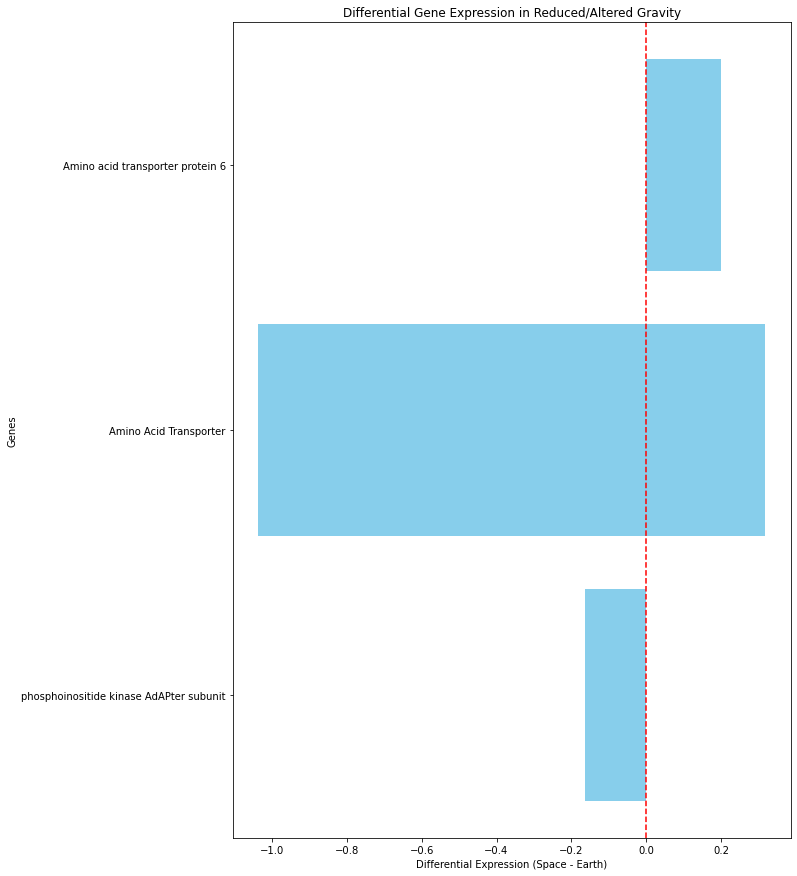

In [16]:
# Plot
plt.figure(figsize=(10, 15))
plt.barh(genes[0:15], differential_expressions[0:15], color='skyblue')
plt.xlabel('Differential Expression (Space - Earth)')
plt.ylabel('Genes')
plt.title('Differential Gene Expression in Reduced/Altered Gravity')
plt.axvline(0, color='red', linestyle='--')  # Reference line for no change
plt.show()

## Create a Digital twin for C.elegans

Pre-training model...
Fine-tuning model...


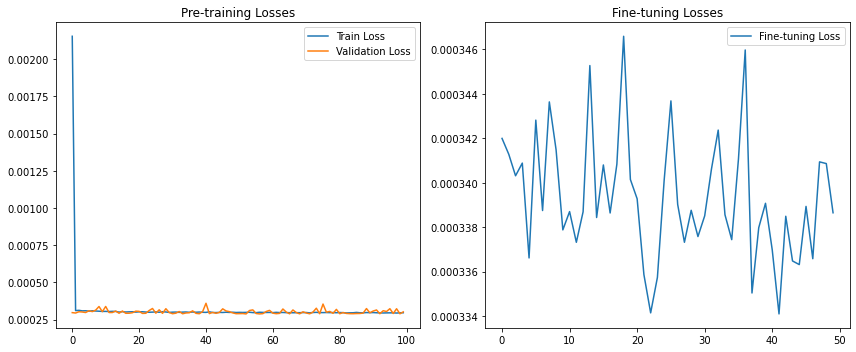

Mean Absolute Error on Validation Data: 0.0130


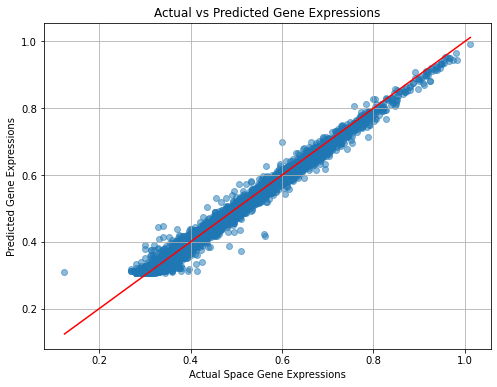

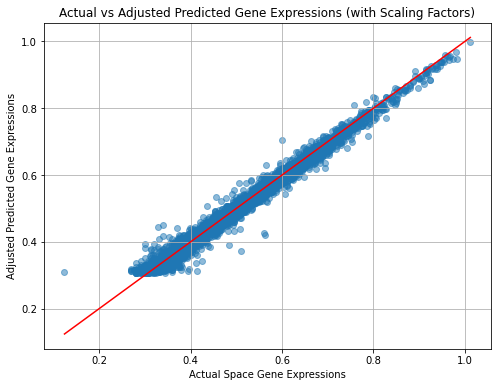

Mean Absolute Error after Second Fine-tuning: 0.0126


In [17]:
# Instantiate and run
digital_twin = DigitwiML.cElegans_DTwin(earth_data, space_data)
digital_twin.train()
digital_twin.validate()
digital_twin.heuristic_fine_tuning()

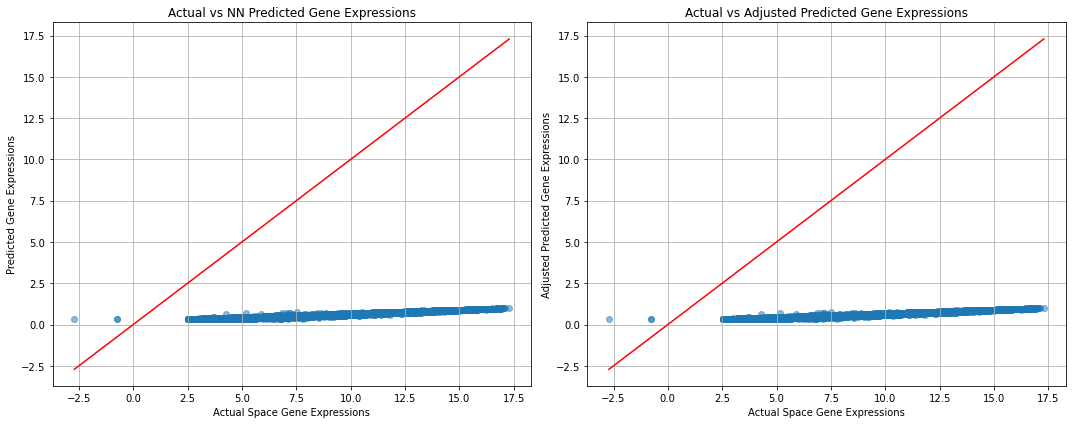

In [18]:
# Using the fine-tuned model to analyze new data
alt_earth_data = df['GSM5284024'].values
alt_space_data = df['GSM5284018'].values

adjusted_predictions = digital_twin.analyze_new_data(alt_earth_data, alt_space_data)

## Some Additional Plots

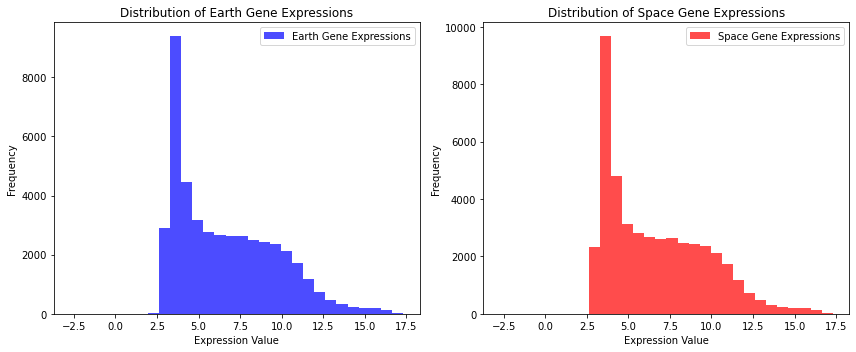

In [19]:
# 1. Distribution of Earth vs. Space Gene Expressions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(digital_twin.earth_data, bins=30, color='blue', alpha=0.7, label='Earth Gene Expressions')
plt.title('Distribution of Earth Gene Expressions')
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(digital_twin.space_data, bins=30, color='red', alpha=0.7, label='Space Gene Expressions')
plt.title('Distribution of Space Gene Expressions')
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

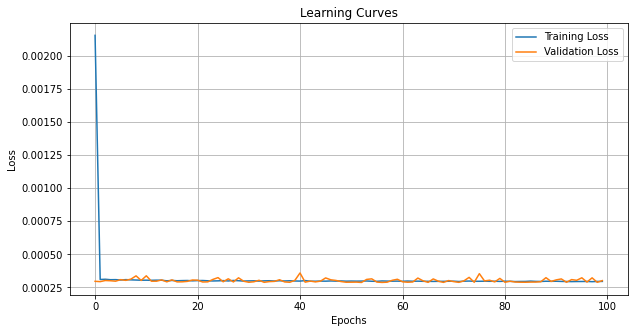

In [20]:
# 3. Learning Curves
history = digital_twin.pretrain_model.history.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

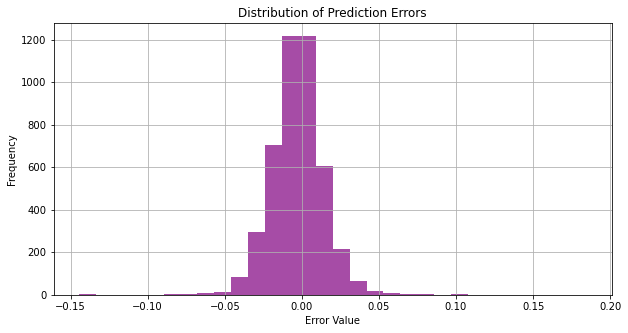

In [22]:
# 4. Error Distribution
predictions = digital_twin.finetune_model.predict(digital_twin.earth_val).reshape(-1)
errors = predictions - digital_twin.space_val.reshape(-1)

plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

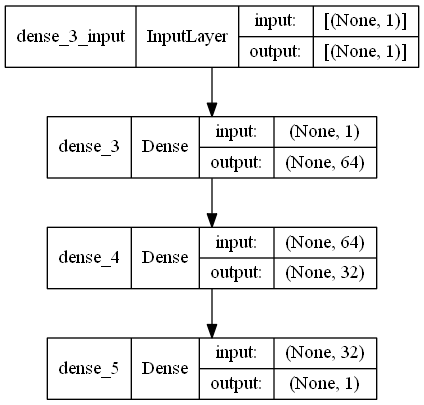

In [23]:
from tensorflow.keras.utils import plot_model

# Assuming digital_twin.finetune_model is the model you want to visualize
plot_model(digital_twin.finetune_model, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True)
